# Predictive Analytics Workshop

This lab aims to introduce you to a basic use case of a machine learning algorithm applied to real-world data, specifically the California house prices https://www.kaggle.com/code/ahmedmahmoud16/california-housing-prices/input

## California Housing Price Prediction - 

> The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

- Target Variable:
    - **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
- Predictor Variables:
    - **longitude**: A measure of how far west a house is; a higher value is farther west
    - **latitude**: A measure of how far north a house is; a higher value is farther north
    - **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
    - **totalRooms**: Total number of rooms within a block
    - **totalBedrooms**: Total number of bedrooms within a block
    - **population**: Total number of people residing within a block
    - **households**: Total number of households, a group of people residing within a home unit, for a block
    - **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
    - **oceanProximity**: Location of the house w.r.t ocean/sea

Let's see if we can predict the price of a house in California given that it's located in a block where the median income is $50,000, the total number of rooms is 3,000, the total number of bedrooms is 500, and the population is 1,500.

### Predicting House Prices
We'll now build a predictive analytics where you will:

- Visualize relationships between features and house prices
- Split the dataset into training/testing sets
- Train a linear regression model
- Evaluate model performance
- Save and use the model for predictions

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)
import joblib  # For saving/loading models

### Load the California Housing dataset

In [2]:
file_path = 'housing.csv'
df = pd.read_csv(file_path)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum() / len(df)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

## Step 0 Handling Missing Values
#### Fill missing values in 'total_bedrooms' with the median value

In [6]:
df.fillna({'total_bedrooms': df['total_bedrooms'].median()}, inplace = True)

In [7]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 1️⃣ Visualizing the Data
### Scatter Plot: Relationship between Rooms & Price

- This helps identify trends and correlations.

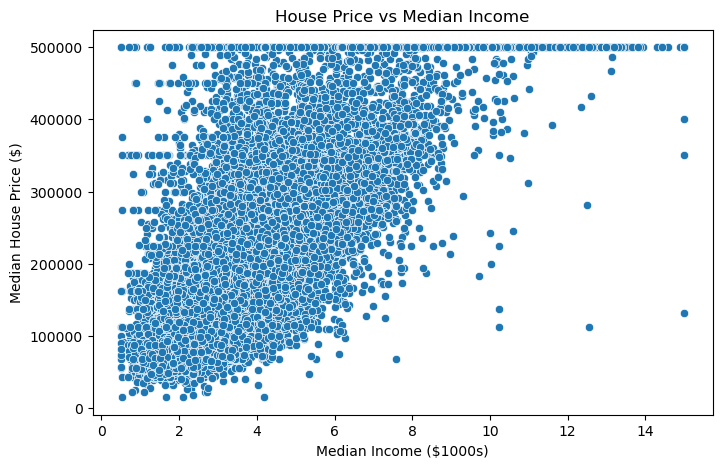

In [8]:
plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = df['median_income'],
    y = df['median_house_value'],
)
plt.xlabel('Median Income ($1000s)')
plt.ylabel('Median House Price ($)')
plt.title('House Price vs Median Income')
plt.show()

### Pair Plot: Correlations Among Features

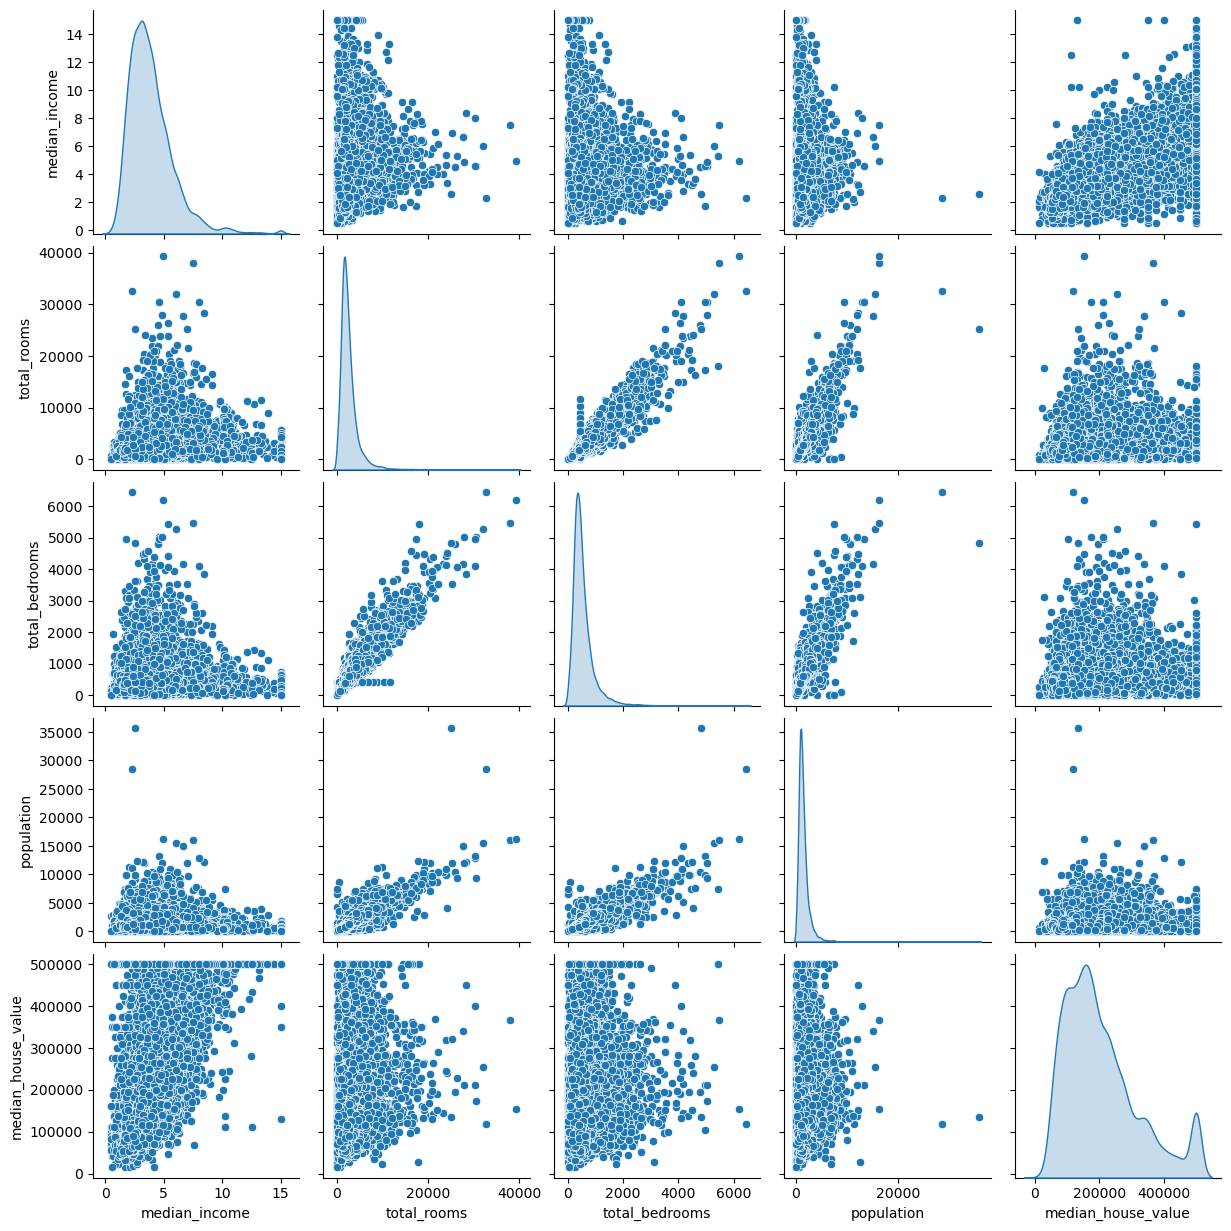

In [9]:
features = [
    'median_income',
    'total_rooms',
    'total_bedrooms',
    'population',
    'median_house_value',
]
sns.pairplot(
    df[features],

    diag_kind = 'kde',
)
plt.show()

## 2️⃣ Splitting Data into Training & Testing
### Define features (X) and target (Y)

- Splitting data prevents overfitting by evaluating the model on unseen data.

In [10]:
target = features.pop(-1)
target

'median_house_value'

In [11]:
X = df[features]  # Selecting key features
Y = df[target]

# Split data into 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 110)

In [12]:
X_train.shape

(16512, 4)

In [13]:
X_test.shape

(4128, 4)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3️⃣ Training the Linear Regression Model
### Train the model

- The model learns how features (income, rooms, bedrooms, population) affect house price.

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Display learned coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 206920.34144864342
Coefficients: [ 89550.69851902 -49377.75120316  75682.05379725 -27051.78518323]


## 4️⃣ Evaluating the Model
### Predict house prices on the test set

## **Regression Metrics & Interpretation**
**For Regression Models (if applicable)**


✅ **MAE** (Mean Absolute Error) → Measures absolute differences.

✅ **MSE** (Mean Squared Error) → Penalizes larger errors.

✅ **RMSE** (Root MSE) → Standardizes MSE to the same units.

✅ **R² Score** → Measures how well the model explains variance (best = 1.0).

✅ **Explained Variance Score** → Measures the proportion of the variance in the target variable that is captured by the model. It is similar to R², but while R² can be affected by bias in the predictions, the explained variance focuses purely on how well the model captures the spread of the data. A score closer to 1 indicates that most of the variance is explained by the model.

### Now, we test the model on an unseen portion of the data.

In [16]:
Y_pred = model.predict(X_test_scaled)

### Calculate Mean Squared Error (MSE) and R² Score

In [17]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(Y_test, Y_pred)
explained_var = explained_variance_score(Y_test, Y_pred)

### Display evaluation metrics

In [18]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)
print("Explained Variance Score:", explained_var)

Mean Absolute Error (MAE): 58116.19561823884
Mean Squared Error (MSE): 5929851309.581795
Root Mean Squared Error (RMSE): 77005.52778587908
R² Score: 0.5425148074259157
Explained Variance Score: 0.5426066012199305


## 5️⃣ Visualizing Predictions vs. Actual Prices

- Closer points are to the red line, the better the model.

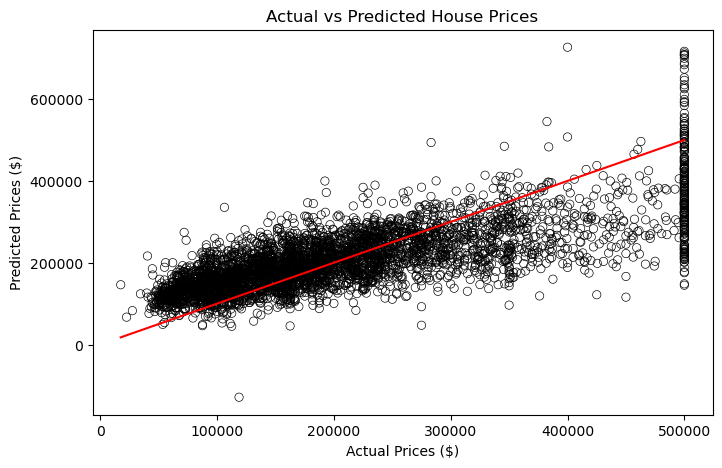

In [19]:
plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = Y_test,
    y = Y_pred,
    facecolors = 'none',
    edgecolors = 'black',
    marker = 'o'
)
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs Predicted House Prices')
plt.plot(
    [min(Y_test),
     max(Y_test)],
    [min(Y_test),
     max(Y_test)],
    color = 'red'
)  # Ideal line

plt.show()

## 6️⃣ Saving and Using the Model
### Save trained model

- The model is saved and can be reused for future house price predictions.

In [20]:
joblib.dump(model, 'california_housing_LR_model.pkl')
joblib.dump(scaler, 'california_housing_scaler.pkl')

['california_housing_scaler.pkl']

In [21]:
# Load model for later use
loaded_model = joblib.load('california_housing_LR_model.pkl')
loaded_scaler = joblib.load('california_housing_scaler.pkl')
# Predict price for a new house
new_house = [
    [5.0, 3000, 500, 1500] # Example: [Median income, Total rooms, Bedrooms, Population]
] 
new_house = pd.DataFrame(new_house, columns = X.columns)
new_house = loaded_scaler.transform(new_house)
predicted_price = loaded_model.predict(new_house)
print(f'Predicted Price for New House: ${predicted_price[0]:,.2f}')

Predicted Price for New House: $243,589.32


In [22]:
act_pred_df = pd.DataFrame({
    'Price': list(Y_test) + list(Y_pred),
    'Type': ['Actual'] * len(Y_test) + ['Predicted'] * len(Y_pred)
})

act_pred_df.head()

,Price,Type
0,108200.0,Actual
1,164000.0,Actual
2,342900.0,Actual
3,181500.0,Actual
4,500001.0,Actual


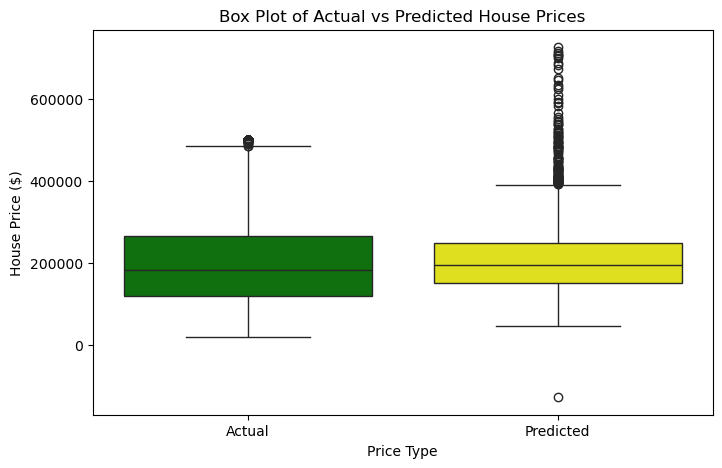

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x = 'Type',
    y = 'Price',
    data = act_pred_df,
    hue = 'Type',
    palette = {'Actual': 'green', 'Predicted': 'yellow'})

# Set labels and title
plt.xlabel('Price Type')
plt.ylabel('House Price ($)')
plt.title('Box Plot of Actual vs Predicted House Prices')

# Show the plot
plt.show()